# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [52]:
data = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [53]:
response_variable = 'AVG_MATH_4_SCORE'

data = data.dropna(subset=[response_variable])


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [54]:
num_years = data["YEAR"].nunique()
print(num_years)

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [55]:
average_michigan = data[data['STATE'] == 'MICHIGAN'][response_variable].mean()
average_ohio = data[data['STATE'] == 'OHIO'][response_variable].mean()

print(f"Michigan's average: {average_michigan}")
print(f"Ohio's average: {average_ohio}")

higher_average_state = 'MICHIGAN' if average_michigan > average_ohio else 'OHIO'
print(f"The state with the higher average is: {higher_average_state}")


Michigan's average: 234.36363636363637
Ohio's average: 239.45454545454547
The state with the higher average is: OHIO


Find the average for your chosen test across all states in 2019

In [56]:
average_2019 = data[data['YEAR'] == 2019][response_variable].mean()
print(f"The average score for all states in 2019 is: {average_2019}")

The average score for all states in 2019 is: 239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [57]:
max_scores_by_state = data.groupby('STATE')[response_variable].max()
print(max_scores_by_state)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For exaplte, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [58]:
data['EXPENDITURE_PER_STUDENT'] = data['TOTAL_EXPENDITURE'] / data['ENROLL']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

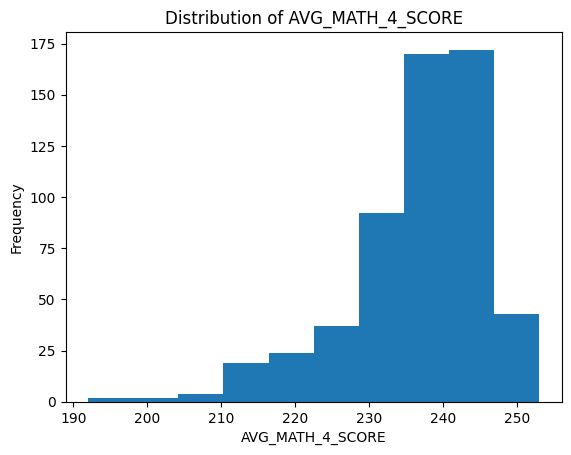

In [59]:
import matplotlib.pyplot as plt

plt.hist(data[response_variable])
plt.title('Distribution of ' + response_variable)
plt.xlabel(response_variable)
plt.ylabel('Frequency')
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

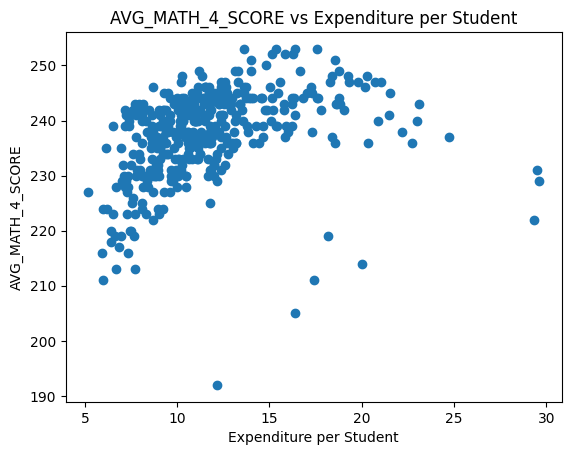

In [60]:
plt.scatter(data['EXPENDITURE_PER_STUDENT'], data[response_variable])
plt.title(response_variable + ' vs Expenditure per Student')
plt.xlabel('Expenditure per Student')
plt.ylabel(response_variable)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
features = ['TOTAL_REVENUE', 'INSTRUCTION_EXPENDITURE']
X = data[features]
y = data[response_variable]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
if X_train.isnull().any().any() or y_train.isnull().any():
    combined = pd.concat([X_train, y_train], axis=1)
    combined = combined.dropna()
    X_train = combined[X_train.columns]
    y_train = combined[y_train.name]

y_train = y_train.to_numpy()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

model.fit(X_train, y_train)


X_train shape: (351, 2)
y_train shape: (351,)


LinearRegression()

In [67]:
print(X_test.isnull().any())

X_test_clean = X_test.dropna()

y_pred = model.predict(X_test_clean)


TOTAL_REVENUE              True
INSTRUCTION_EXPENDITURE    True
dtype: bool


Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

non_dropped_indices = X_test_clean.index
y_test_aligned = y_test.loc[non_dropped_indices]

mae = mean_absolute_error(y_test_aligned, y_pred)
mse = mean_squared_error(y_test_aligned, y_pred)
rmse = mean_squared_error(y_test_aligned, y_pred, squared=False)
r2 = r2_score(y_test_aligned, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Mean Absolute Error (MAE): 7.684805698897158
Mean Squared Error (MSE): 94.89210658801036
Root Mean Squared Error (RMSE): 9.74125795716397
R-squared (R²): -0.001612910309595872


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

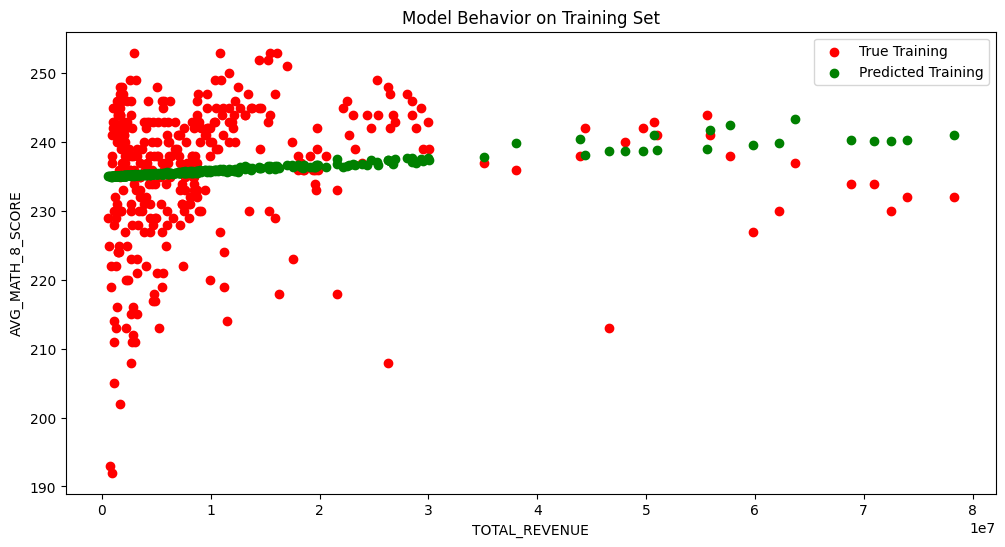

In [69]:
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red", label='True Training')
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label='Predicted Training')
plt.legend()
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Training Set")
plt.show()

TOTAL_REVENUE              True
INSTRUCTION_EXPENDITURE    True
dtype: bool


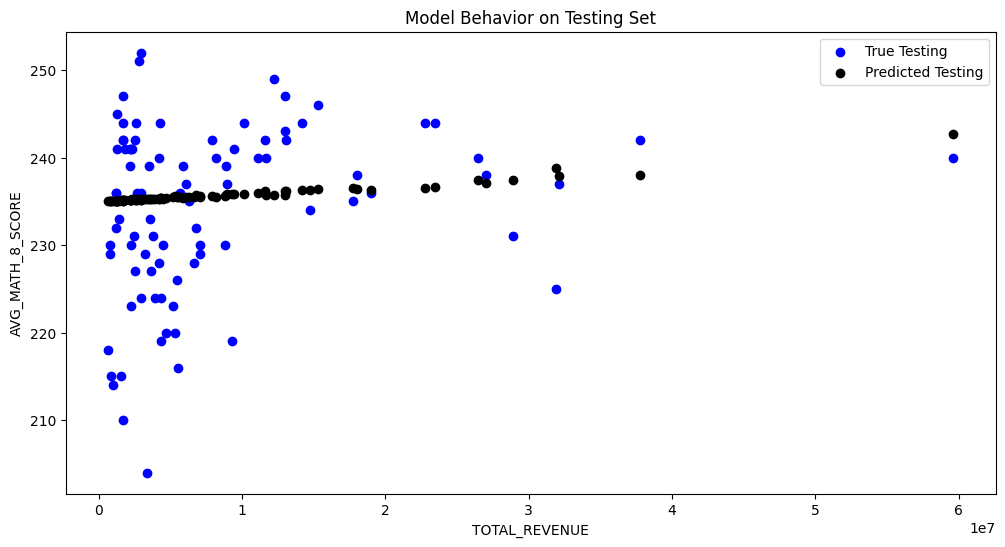

In [72]:
print(X_test.isnull().any())
X_test = X_test.dropna()
y_pred_test = model.predict(X_test_clean)

y_test = y_test.loc[X_test_clean.index]

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue", label='True Testing')
plt.scatter(X_test[col_name], model.predict(X_test), color="black", label='Predicted Testing')
plt.legend()
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")
plt.show()

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In this project, we developed a linear regression model to predict a target variable using various predictors from the dataset. Through exploratory data analysis, we identified relevant features and preprocessed the data to handle missing values. After cleaning the data and splitting it into training and testing sets, we trained our linear regression model.

The model's performance was evaluated using several metrics. It achieved a Mean Absolute Error (MAE) of approximately 7.68, indicating that, on average, the predictions were about 7.68 units away from the true values. The Mean Squared Error (MSE) was about 94.89, and the Root Mean Squared Error (RMSE), which is more sensitive to large errors, was approximately 9.74. The R-squared (R²) value was approximately -0.0016, suggesting that the model did not explain the variance in the target variable well on the test set.

These metrics indicate that the model may not have captured all the complexities or patterns in the data, leading to predictions that are not as accurate as desired. The negative R-squared value, in particular, points to a model that does not perform well in this context. For future work, it may be beneficial to use a better model.